# Выделение признаков

In [5]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# выделение признаков при помощи TSFresh
from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters, EfficientFCParameters, MinimalFCParameters

# Создаём временные ряды и визуализируем их

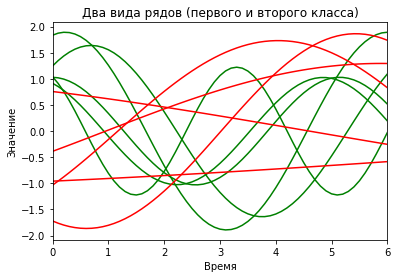

data.shape = (122000, 4)
data.id.nunique() = 2000


,t,y,class,id
0,0.0,3.245872,1,0
1,0.1,3.348260,1,0
2,0.2,3.436487,1,0


In [6]:
N = 1000 ## количество семплов каждого класса
Nvis = 5 ## сколько семплов будем визуализировать
timePoints = 61  ## количество элементов в каждом из рядов

df = pd.DataFrame()
data = pd.DataFrame()
t = np.linspace(0, 6, timePoints) 

random.seed(42)

## генерируем семплы первого класса
for i in range(N):
    A = 1 + random.random()        ## амплитуда
    w = 1 + random.random()        ## частота
    ph = np.pi * random.random()   ## фаза
    
    
    df['t']  = t                   ## ось времени
    df['y']  = A*np.sin(t*w + ph)  ## значения временного ряда
    df['class'] = 1                ## класс временного ряда 
    df['id'] = i                   ## номер временного ряда
    
    data = data.append(df)         ## добавляем семпл в общий дейтафрейм
    if i < Nvis:                   ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color='g') 
    
## генерируем семплы второго класса    
for i in range(N, 2*N):
    A = 1 + random.random()          ## амплитуда
    w = 0 + random.random()          ## частота
    ph = 2*np.pi * random.random()   ## фаза
    
    df['t']  = t                     ## ось времени
    df['y']  = A*np.sin(t*w + ph)    ## значения временного ряда
    df['class'] = 0                  ## класс временного ряда 
    df['id'] = i                     ## номер временного ряда
    
    data = data.append(df)           ## добавляем семпл в общий дейтафрейм
    if i < Nvis+N:                   ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color='r') 
    
## cдвигаем все значения вверх, чтобы все значения были положительными    
data['y'] = data.y + np.abs(data.y.min())
    
plt.xlabel("Время")
plt.ylabel("Значение")
plt.title('Два вида рядов (первого и второго класса)')
plt.xlim([t[0], t[-1]])
plt.show()

print('data.shape =', data.shape)
print('data.id.nunique() =', data.id.nunique())
data.head(3)

# Выделение признаков при помощи TSFresh
http://tsfresh.readthedocs.io/en/latest/

In [7]:
def featuresTSFresh(data):    

    ## список фич (см. документацию по TSFresh: https://media.readthedocs.org/pdf/tsfresh/latest/tsfresh.pdf)
    extraction_settings = \
    {
        ## признак: параметр
        "maximum": None,
        "mean": None,
        "minimum": None,
        "median": None,
        "standard_deviation": None,
        "binned_entropy": [{"max_bins" : 10}],
        "count_above_mean": None,
        "count_below_mean": None,
        "first_location_of_maximum": None,
        "first_location_of_minimum": None,
        "mean_change": None,
        "sum_values": None,
        "kurtosis": None,
        "skewness": None,
        "abs_energy": None        
    }

    ## извлечение фич из данных    
    featuresDF = extract_features(
        data, 
        column_id='id',  ## номер временного ряда
        column_sort='t', ## ось времени
        default_fc_parameters=extraction_settings, ## список фич, которые хотим извлечь
        impute_function=impute                     ## заменить все inf и NaN
    )
    
    ## вытаскиваем колонку id из индекса 
    featuresDF = featuresDF.reset_index()

    return featuresDF

## убираем колонку class из данных (мы не хотим из неё извлекать фичи)
features = featuresTSFresh(data.drop('class', axis=1))

## помечаем ряды (добавляем обратно первый и второй класс)
features['label'] = 0
features['label'].iloc[N:] = 1

print('data.shape =', data.shape)
print('features.shape =', features.shape)
features.head(3)

Feature Extraction: 100%|██████████| 10/10 [00:05<00:00,  1.92it/s]


data.shape = (122000, 4)
features.shape = (2000, 17)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,index,y__maximum,y__mean,y__minimum,y__median,y__standard_deviation,y__binned_entropy__max_bins_10,y__count_above_mean,y__count_below_mean,y__first_location_of_maximum,y__first_location_of_minimum,y__mean_change,y__sum_values,y__kurtosis,y__skewness,y__abs_energy,label
0,0,3.638476,1.993396,0.361503,2.021114,1.159167,2.177507,31.0,30.0,0.114754,0.622951,-0.002539,121.597163,-1.522487,0.010053,324.355057,0
1,1,3.222351,1.831576,0.776047,1.756307,0.828757,2.185494,27.0,34.0,0.540984,0.836066,-0.017766,111.726131,-1.365224,0.291575,246.532037,0
2,2,3.891279,2.096981,0.107249,2.144667,1.367380,2.146856,31.0,30.0,0.983607,0.508197,0.000943,127.915835,-1.548907,-0.083391,382.290408,0


# Машинное обучение

In [9]:
trainSet

,index,y__maximum,y__mean,y__minimum,y__median,y__standard_deviation,y__binned_entropy__max_bins_10,y__count_above_mean,y__count_below_mean,y__first_location_of_maximum,y__first_location_of_minimum,y__mean_change,y__sum_values,y__kurtosis,y__skewness,y__abs_energy,label
798,798,3.594274,1.876550,0.402995,1.756210,1.138511,2.130375,29.0,32.0,0.606557,0.295082,-0.048774,114.469569,-1.533768,0.132702,293.876493,0
1102,1102,3.315099,2.338583,0.704464,2.597409,0.872597,2.102460,36.0,25.0,0.672131,0.000000,0.026719,142.653570,-1.079915,-0.603075,380.054193,1
105,105,3.883272,2.044819,0.117385,2.048974,1.273398,2.228279,31.0,30.0,0.688525,0.327869,-0.054958,124.733963,-1.460407,-0.043502,353.972466,0
126,126,3.311497,1.858641,0.686787,1.814262,0.877343,2.213315,29.0,32.0,0.491803,0.770492,-0.001438,113.377115,-1.405427,0.173036,257.680969,0
1995,1995,2.855010,1.093015,0.131417,0.939491,0.805962,2.115474,27.0,34.0,0.983607,0.442623,0.009594,66.673913,-0.951355,0.520829,112.499669,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,1130,3.699113,3.474310,3.127763,3.506488,0.171423,2.219110,34.0,27.0,0.983607,0.000000,0.009523,211.932911,-1.048958,-0.445472,738.113169,1
1294,1294,2.380411,1.081120,0.267798,0.948552,0.662967,2.183699,27.0,34.0,0.000000,0.983607,-0.035210,65.948308,-1.139639,0.439373,98.109101,1
860,860,3.136218,1.839950,0.862959,1.759290,0.751892,2.217171,29.0,32.0,0.508197,0.213115,-0.005186,112.236952,-1.316942,0.264568,240.996184,0
1459,1459,3.763983,1.513795,0.191939,1.095363,1.206083,2.070938,24.0,37.0,0.000000,0.704918,-0.040775,92.341474,-1.120950,0.607370,228.518902,1


trainSet.shape = (1200, 17)
testSet.shape  = (800, 17)

Value counts train:
 1    603
0    597
Name: label, dtype: int64

Value counts test:
 0    403
1    397
Name: label, dtype: int64


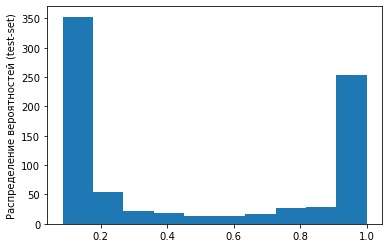

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


                          features   importances
12                     y__kurtosis  5.348543e-01
9     y__first_location_of_minimum  2.764692e-01
5   y__binned_entropy__max_bins_10  9.558191e-02
4            y__standard_deviation  3.486869e-02
8     y__first_location_of_maximum  2.662037e-02
10                  y__mean_change  8.148802e-03
1                          y__mean  8.034701e-03
11                   y__sum_values  6.024088e-03
3                        y__median  4.364598e-03
14                   y__abs_energy  2.369408e-03
13                     y__skewness  2.036991e-03
0                       y__maximum  2.565418e-04
7              y__count_below_mean  2.391088e-04
2                       y__minimum  1.312449e-04
6              y__count_above_mean  1.015743e-17

   Pos  Neg
0  394    9
1   63  334

AUC = 0.960  Точность = 0.910



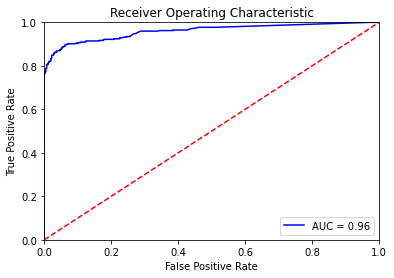

In [10]:
## разбиваем выделенные фичи на тренировочный и тестовый наборы 
trainSet, testSet = train_test_split(features, test_size=0.4, random_state=42) 

## выводим статистику по нашим наборам
print('trainSet.shape =', trainSet.shape)
print('testSet.shape  =', testSet.shape)
print()
print('Value counts train:\n', trainSet.label.value_counts())
print()
print('Value counts test:\n', testSet.label.value_counts())

## лист фич
#featureList = trainSet.drop(['id', 'label'], axis=1).columns
featureList = trainSet.drop(['index', 'label'], axis=1).columns
## параметры классификатора
params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2, 'max_features' : 1.0, 'class_weight' : 'balanced',
         'random_state': 42}

## обучаем классификатор
clf = RandomForestClassifier(**params).fit(trainSet[featureList], trainSet['label'])

## делаем предсказание на тестовом наборе
y_pred = clf.predict(testSet[featureList])
y_pred_proba = clf.predict_proba(testSet[featureList])[:, 1]  ## вероятности

## визуализируем вероятности для предсказаний
import matplotlib.pyplot as plt
plt.hist(y_pred_proba)
plt.ylabel('Распределение вероятностей (test-set)')
plt.show()



from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from math import isnan

## создадим для удобства дейтафрейм с результатами
res = testSet
res['pred'] = y_pred 
res['pred_proba'] = y_pred_proba

## получаем из классификатора важность фич и отображаем их
ftmprt = pd.DataFrame()
ftmprt['features'] = featureList
ftmprt['importances'] = clf.feature_importances_
ftmprt = ftmprt.sort_values('importances', ascending=False)
print(ftmprt.head(20))
print()
proba = res.pred_proba

## считаем матрицу ошибок
CM = confusion_matrix(res['label'], res['pred'])
CM_DF = pd.DataFrame(data=CM, columns = ['Pos', 'Neg'])
print(CM_DF)

# ROC-AUC 
FPR, TPR, thresholds = roc_curve(res['label'], res['pred_proba'])
roc_auc = auc(FPR, TPR)
acc = res[res['pred'] == res['label']].shape[0] / res.shape[0] ## точность
print(f"\nAUC = {roc_auc:.3f}  Точность = {acc:.3f}\n")

# ROC-кривая
plt.title('Receiver Operating Characteristic')
plt.plot(FPR, TPR, 'b', label=f'AUC = {roc_auc:.2f}')
plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from tsfresh import extract_features, extract_relevant_features, select_features
from tsfresh.utilities.dataframe_functions import impute
from tsfresh.feature_extraction import ComprehensiveFCParameters, EfficientFCParameters, MinimalFCParameters

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from math import isnan

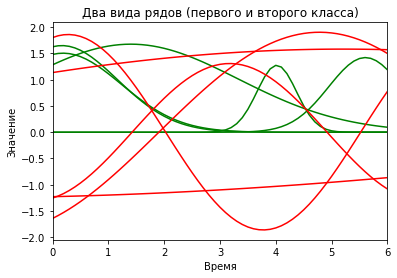

data.shape = (12200, 4)
data.id.nunique() = 200


,t,y,label,id
0,0.0,1.957849,1,0
1,0.1,1.957849,1,0
2,0.2,1.957849,1,0


In [12]:
N = 100 ## количество семплов каждого класса
Nvis = 5 ## сколько семплов будем визуализировать
timePoints = 61  ## количество элементов в каждом из рядов

df = pd.DataFrame()
data = pd.DataFrame()
t = np.linspace(0, 6, timePoints) 

random.seed(42)

## генерируем семплы первого класса
for i in range(N):
    t0 = 2*np.pi*random.random()
    a1 = 5*random.random()
    A = 1 + random.random()        
    
    df['t']  = t                   ## ось времени
    df['y']  = A*np.exp(-(df.t-t0)**2/2/a1)  ## значения временного ряда
    df['label'] = 1                ## класс временного ряда 
    df['id'] = i                   ## номер временного ряда
    
    data = data.append(df)         ## добавляем семпл в общий дейтафрейм
    if i < Nvis:                   ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color='g') 
    
## генерируем семплы второго класса    
for i in range(N, 2*N):
    A = 1 + random.random()          ## амплитуда
    w = 0 + random.random()          ## частота
    ph = 2*np.pi * random.random()   ## фаза
    
    df['t']  = t                     ## ось времени
    df['y']  = A*np.sin(t*w + ph)    ## значения временного ряда
    df['label'] = 0                  ## класс временного ряда 
    df['id'] = i                     ## номер временного ряда
    
    data = data.append(df)           ## добавляем семпл в общий дейтафрейм
    if i < Nvis+N:                   ## визуализируем первые Nvis-штук
        plt.plot(df.t, df.y, color='r') 
    
## cдвигаем все значения вверх, чтобы все значения были положительными    
data['y'] = data.y + np.abs(data.y.min())
    
plt.xlabel("Время")
plt.ylabel("Значение")
plt.title('Два вида рядов (первого и второго класса)')
plt.xlim([t[0], t[-1]])
plt.show()

print('data.shape =', data.shape)
print('data.id.nunique() =', data.id.nunique())
data.head(3)

In [28]:
def featuresTSFresh(data):    

    ## список фич (см. документацию по TSFresh: https://media.readthedocs.org/pdf/tsfresh/latest/tsfresh.pdf)
    extraction_settings = \
    {
        ## признак: параметр
        "maximum": None,
        "mean": None,
        "minimum": None,
        "median": None,      
    }

    ## извлечение фич из данных    
    featuresDF = extract_features(
        data, 
        column_id='id',  ## номер временного ряда
        column_sort='t', ## ось времени
        default_fc_parameters=extraction_settings, ## список фич, которые хотим извлечь
        impute_function=impute                     ## заменить все inf и NaN
    )
    
    ## вытаскиваем колонку id из индекса 
    featuresDF = featuresDF.reset_index()

    return featuresDF

In [29]:
features = featuresTSFresh(data)

Feature Extraction: 100%|██████████| 10/10 [00:04<00:00,  2.07it/s]


In [30]:
features['label'] = 0
features['label'].iloc[N:] = 1
features


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,index,y__maximum,y__mean,y__minimum,y__median,label__maximum,label__mean,label__minimum,label__median,label
0,0,3.231294,2.143130,1.957849,1.957977,1.0,1.0,1.0,1.0,0
1,1,3.634548,2.972939,2.052910,3.143508,1.0,1.0,1.0,1.0,0
2,2,3.379718,2.246776,1.957849,1.958426,1.0,1.0,1.0,1.0,0
3,3,3.463092,2.339297,1.957850,1.998222,1.0,1.0,1.0,1.0,0
4,4,3.606816,2.354036,1.957850,1.986966,1.0,1.0,1.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...
195,195,2.372536,1.203662,0.714004,1.008454,0.0,0.0,0.0,0.0,1
196,196,1.003554,0.922809,0.847096,0.921486,0.0,0.0,0.0,0.0,1
197,197,1.960760,1.305666,0.828983,1.257858,0.0,0.0,0.0,0.0,1
198,198,3.298036,2.110081,0.618728,2.270264,0.0,0.0,0.0,0.0,1


trainSet.shape = (120, 10)
testSet.shape  = (80, 10)

Value counts train:  1    60
0    60
Name: label, dtype: int64

Value counts test:  1    40
0    40
Name: label, dtype: int64


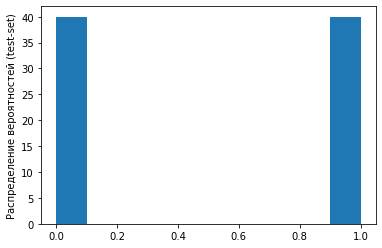

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


         features  importances
5     label__mean         0.38
7   label__median         0.27
4  label__maximum         0.21
6  label__minimum         0.14
0      y__maximum         0.00
1         y__mean         0.00
2      y__minimum         0.00
3       y__median         0.00

   Pos  Neg
0   40    0
1    0   40

 AUC = 1.000  Точность = 1.000 



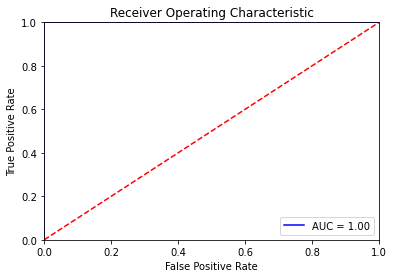

In [31]:
trainSet, testSet = train_test_split(features, test_size=0.4, random_state=42) 

## выводим статистику по нашим наборам
print('trainSet.shape =', trainSet.shape)
print('testSet.shape  =', testSet.shape)
print()
print('Value counts train: ',
      trainSet.label.value_counts())
print()
print('Value counts test: ', testSet.label.value_counts())

## лист фич
featureList = trainSet.drop(['index', 'label'], axis=1).columns

## параметры классификатора
params = {'n_estimators': 100, 'max_depth': 4, 'min_samples_split': 2, 'max_features' : 1.0, 'class_weight' : 'balanced',
         'random_state': 42}

## обучаем классификатор
clf = RandomForestClassifier(**params).fit(trainSet[featureList], trainSet['label'])

## делаем предсказание на тестовом наборе
y_pred = clf.predict(testSet[featureList])
y_pred_proba = clf.predict_proba(testSet[featureList])[:, 1]  ## вероятности

## визуализируем вероятности для предсказаний
plt.hist(y_pred_proba)
plt.ylabel('Распределение вероятностей (test-set)')
plt.show()
## создадим для удобства дейтафрейм с результатами
res = testSet
res['pred'] = y_pred 
res['pred_proba'] = y_pred_proba

## получаем из классификатора важность фич и отображаем их
ftmprt = pd.DataFrame()
ftmprt['features'] = featureList
ftmprt['importances'] = clf.feature_importances_
ftmprt = ftmprt.sort_values('importances', ascending=
False)
print(ftmprt.head(20))
print()
proba = res.pred_proba

## считаем матрицу ошибок
CM = confusion_matrix(res['label'], res['pred'])
CM_DF = pd.DataFrame(data=CM, columns = ['Pos', 'Neg'])
print(CM_DF)

# ROC-AUC 
FPR, TPR, thresholds = roc_curve(res['label'], res['pred_proba'])
roc_auc = auc(FPR, TPR)
acc = res[res['pred'] == res['label']].shape[0] / res.shape[0] ## точность
print(f"\n AUC = {roc_auc:.3f}  Точность = {acc:.3f} \n")

# ROC-кривая
plt.title('Receiver Operating Characteristic')
plt.plot(FPR, TPR, 'b', label=f'AUC = {roc_auc:.2f}')
plt.legend(loc=
'lower right')
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()